# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ridho Nur Fauzi
- **Email:** ridho.nurfauzi123@gmail.com
- **ID Dicoding:** cooooorvus

## Menentukan Pertanyaan Bisnis

- Apakah ada perbedaan yang signifikan terhadap jumlah sewa sepeda di hari libur dibandingkan dengan hari kerja?
- Apakah penyewa kembali menyewa sepeda setelah pengalaman pertama si penyewa?



## Import Semua Packages/Library yang Digunakan

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

Data wrangling merupakan sebuah proses atau kumpulan kegiatan yang meliputi pengumpulan data (Gathering data), penilaian data (Assessing data), serta pembersihan data (Cleaning data) sebelum data digunakan dalam proses analisis data.

### Gathering Data

Tahap data wrangling, dimulai dengan proses pengumpulan data. Pada proses ini kita akan mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis yang di hadapi.

***- DAY***

In [35]:
url_day = "/content/day.csv"
day_df = pd.read_csv(url_day)
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight**
- Total penyewa sepeda cenderung rendah pada saat hari libur dan cuaca sedang mendung, mungkin dikarenakan penyewa takut tiba-tiba kehujanan saat menaiki sepeda
- Total penyewa sepeda cendrung tinggi pada saat
cuaca cerah dan hari kerja, mungkin dikarenakan pengguna harus berangkat kerja dan tidak takut untuk kehujanan

***- Hour***

In [36]:
url_hour = "/content/hour.csv"
hour_df = pd.read_csv(url_hour)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight**
- Mayoritas pengguna sepeda perjam adalah registered
- Peminjaman sepeda paling lama adalah 5 jam namun pengguna sepeda sedikit

### Assessing Data

Setelah semua data yang dibutuhkan terkumpul, proses selanjutnya ialah penilaian terhadap data tersebut. Proses ini dilakukan untuk menilai kualitas dan struktur dari sebuah data. Selain itu, proses ini juga bertujuan untuk mengidentifikasi berbagai masalah yang terdapat dalam data, seperti missing value, unstandard value, dll.

***- Day***

In [37]:
# Memerikasi Tipe Data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [38]:
# Missing Value
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [39]:
# Duplikasi
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [40]:
# Inaccurate Value
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [41]:
# Mengecek Outlier
data = day_df['casual'].values
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
outliers = [x for x in data if x < minimum or x > maximum]
print("Jumlah outliers:", len(outliers))
print("Outliers:", sorted(outliers))


Jumlah outliers: 44
Outliers: [2282, 2290, 2301, 2345, 2347, 2352, 2355, 2355, 2397, 2418, 2454, 2469, 2494, 2496, 2512, 2521, 2541, 2544, 2551, 2557, 2562, 2570, 2589, 2613, 2622, 2634, 2643, 2657, 2704, 2708, 2795, 2795, 2806, 2827, 2846, 2855, 2963, 3031, 3065, 3155, 3160, 3252, 3283, 3410]


**Insight:**
- Terdapat tipe data yang kurang sesuai yaitu pada kolom dteday seharusnya datetime bukan object
- Pada pengecekan oulier terjadi gap pada data yang berada pada kolom casual

***- Hour***

In [42]:
# Memerikasi Tipe Data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [43]:
# Missing Value
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [44]:
# Duplikasi
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [45]:
# Inaccurate Value
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [46]:
# Mengecek Outlier
data = hour_df['casual'].values
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
outliers = [x for x in data if x < minimum or x > maximum]
print("Jumlah outliers:", len(outliers))
print("Outliers:", sorted(outliers))


Jumlah outliers: 1192
Outliers: [115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 126, 126, 126, 126, 126, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 12



> **Insight:**
- Sama dengan table day pada table hour tipe data dteday tidak sesuai seharusnya datetime
- Pada table hour saat pengecekan outlier kolom casual juga memiliki gap pada data yang cukup besar


### Cleaning Data

Apabila pada proses sebelumnya kita menemukan masalah (missing value, outlier, dll.) yang terdapat di dalam sebuah data, masalah tersebut harus dibersihkan sebelum masuk tahap analisis data. Terdapat beberapa teknik yang dapat kita gunakan untuk membersihkan data. Seluruh teknik tersebut akan kita pelajari pada beberapa materi ke depan.

***- Day***

In [47]:
# imputation casual
df = pd.read_csv("day.csv")

Q1 = (df['casual']).quantile(0.25)
Q3 = (df['casual']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = df['casual'] < minimum
kondisi_more_than = df['casual'] > maximum

print("Jumlah data sebelum:", len(df))
df.drop(df[kondisi_lower_than].index, inplace=True)
df.drop(df[kondisi_more_than].index, inplace=True)
print("Jumlah data setelah:", len(df))


Jumlah data sebelum: 731
Jumlah data setelah: 687


In [48]:
# Ubah tipe data Dateday
datetime_columns = ["dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Sebelumnya terjadi data gap yang terlalu jauh atau oulier, namun sekarang data sudah di perbaiaki dengan menggunakan imputation
- Sebelumnya juga terjadi kesalahan tipe data pada kolom dteday, tipe data sebelumnya dalah object, namun sekrang sudah berubah menjadi datetime

***- Hour***


In [49]:
# imputation casual
df = pd.read_csv("hour.csv")

Q1 = (df['casual']).quantile(0.25)
Q3 = (df['casual']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = df['casual'] < minimum
kondisi_more_than = df['casual'] > maximum

print("Jumlah data sebelum:", len(df))
df.drop(df[kondisi_lower_than].index, inplace=True)
df.drop(df[kondisi_more_than].index, inplace=True)
print("Jumlah data setelah:", len(df))


Jumlah data sebelum: 17379
Jumlah data setelah: 16187


In [50]:
# Ubah tipe data Dateday
datetime_columns = ["dteday"]
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Sama seperti kolom day, pada kolo hour juga terjadi data gap yang terlalu besar atau outlier, namun sekarang data sudah di perbaiaki dengan menggunakan imputation
- Terjadi kesalahan tipe data juga hal yang sama pada table day, pada table hour kolom dteday juga terjadi kesalahan tipe data, tipe data sebelumnya adalah object, namun sekrang sudah ubah menjadi datetime

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) merupakan tahap eksplorasi data yang telah dibersihkan guna memperoleh insight dan menjawab pertanyaan analisis. Pada prosesnya, kita akan sering menggunakan berbagai teknik dan parameter dalam descriptive statistics yang bertujuan untuk menemukan pola, hubungan, serta membangun intuisi terkait data yang diolah. Selain itu, tidak jarang kita juga menggunakan visualisasi data untuk menemukan pola dan memvalidasi parameter descriptive statistics yang diperoleh.

### Explore ...

In [51]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [52]:
seasonal_avg = day_df.groupby('season')['cnt'].mean().reset_index()
print("Rata-rata Penyewaan per Musim:")
print(seasonal_avg)

Rata-rata Penyewaan per Musim:
   season          cnt
0       1  2604.132597
1       2  4992.331522
2       3  5644.303191
3       4  4728.162921


In [53]:
working_day_analysis = day_df.groupby('workingday')['cnt'].agg(['sum', 'mean']).reset_index()
working_day_analysis['workingday'] = working_day_analysis['workingday'].map({0: 'Holiday', 1: 'Working Day'})
print("Analisis Penyewaan berdasarkan Hari Kerja dan Hari Libur:")
print(working_day_analysis)

Analisis Penyewaan berdasarkan Hari Kerja dan Hari Libur:
    workingday      sum         mean
0      Holiday  1000269  4330.168831
1  Working Day  2292410  4584.820000


**Insight**
- Penyewaan per musim sepeda tertinggi yaitu pada season 3 (musim gugur) dengan rata-rata 5.644, disebabkan cuaca yg lebih relatif stabil, namun penyewaan paling rendah pada musim 1 (musim semi) yaitu 2.604
- penyewaan berdasarkan hari kerja dan hari libur, berdasarkan working day penyewaan mencapai 2.292.410 dengan rata-rata 4.584, sedangkan pada holiday 1.000.269 dengan rata-rata 4.330 penyewa perhari, meskipun cukup tinggi, namun jika di bandikan dengan hari kerja itu cukup rendah

In [54]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [55]:
total_per_hour = hour_df.groupby('hr')['cnt'].sum().reset_index()
print("Total Penyewaan per Jam:")
print(total_per_hour)

Total Penyewaan per Jam:
    hr     cnt
0    0   39130
1    1   24164
2    2   16352
3    3    8174
4    4    4428
5    5   14261
6    6   55132
7    7  154171
8    8  261001
9    9  159438
10  10  126257
11  11  151320
12  12  184414
13  13  184919
14  14  175652
15  15  183149
16  16  227748
17  17  336860
18  18  309772
19  19  226789
20  20  164550
21  21  125445
22  22   95612
23  23   63941


In [56]:
avg_temp_per_hour = hour_df.groupby('hr')['temp'].mean().reset_index()
total_per_hour = hour_df.groupby('hr')['cnt'].sum().reset_index()
merged_data = pd.merge(avg_temp_per_hour, total_per_hour, on='hr', how='inner')
merged_data.columns = ['hr', 'avg_temp', 'total_rentals']
print(merged_data)


    hr  avg_temp  total_rentals
0    0  0.467410          39130
1    1  0.459365          24164
2    2  0.454573          16352
3    3  0.453113           8174
4    4  0.446628           4428
5    5  0.436123          14261
6    6  0.432469          55132
7    7  0.439092         154171
8    8  0.454993         261001
9    9  0.476726         159438
10  10  0.500578         126257
11  11  0.522613         151320
12  12  0.540275         184414
13  13  0.554733         184919
14  14  0.565075         175652
15  15  0.568615         183149
16  16  0.564959         227748
17  17  0.554575         336860
18  18  0.541181         309772
19  19  0.524176         226789
20  20  0.508599         164550
21  21  0.495302         125445
22  22  0.484505          95612
23  23  0.475027          63941


**Insight:**
- penyewaan tertinggi terjadi di jam 17 mencapai 336.860, bisa disimpulkan bahwa penyewaan terus naik seiring berjalannya waktu dan turun terus pada malam hari
- Pada saat suhu terus menigkat seiring bertambahnya jam mulai dari 0.467 pada jam 0 dan pada jam 17 yaitu tertinggi, namun setelah jam 17 penyewaan turun serta berubahnya suhu yang ikut menurun, penyewaan sepeda cenderung lebih sedikit saat malam hari

## Visualization & Explanatory Analysis



*    visualisasi data merupakan cara data analis dalam menyajikan data dalam bentuk visual. Hal ini dilakukan untuk mempermudah orang lain dalam memahami data tersebut. Selain itu, visualisasi data yang baik juga akan sangat membantu dalam menyampaikan story dan pesan dari sebuah data.
*   exploratory analysis merupakan proses analisis data yang bertujuan untuk mengeksplorasi dan mengenal sebuah data. Pada prosesnya sering kali mulai dengan mendefinisikan berbagai pertanyaan atau hanya menggali data guna menemukan beberapa insight yang menarik dari sebuah data.

### Pertanyaan 1: Bagaimana pola penyewaan sepeda per jam pada hari kerja dibandingkan dengan hari libur?

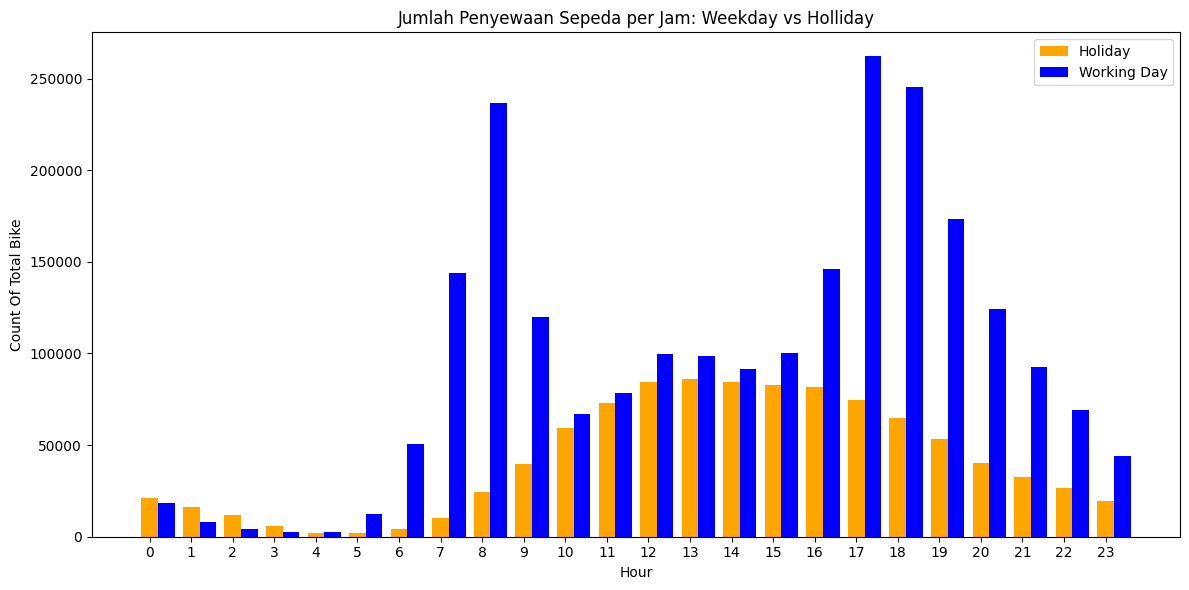

In [57]:
total_per_hour = hour_df.groupby(['hr', 'workingday'])['cnt'].sum().reset_index()

total_per_hour['workingday'] = total_per_hour['workingday'].replace({0: 'Holiday', 1: 'Working Day'})

holiday_data = total_per_hour[total_per_hour['workingday'] == 'Holiday']
working_day_data = total_per_hour[total_per_hour['workingday'] == 'Working Day']

plt.figure(figsize=(12, 6))

plt.bar(holiday_data['hr'], holiday_data['cnt'], width=0.4, label='Holiday', color='orange', align='center')

plt.bar(working_day_data['hr'] + 0.4, working_day_data['cnt'], width=0.4, label='Working Day', color='blue', align='center')

plt.title('Jumlah Penyewaan Sepeda per Jam: Weekday vs Holliday')
plt.xlabel('Hour')
plt.ylabel('Count Of Total Bike')
plt.xticks(holiday_data['hr'], rotation=0)
plt.legend()

plt.tight_layout()
plt.show()


### Pertanyaan 2: Berapa persentase pengguna yang merupakan pengguna terdaftar dibandingkan dengan pengguna kasual?

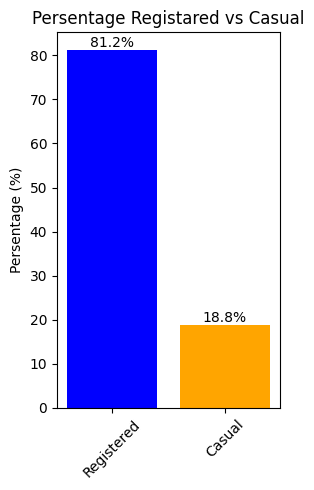

In [58]:
total_registered = day_df['registered'].sum()
total_casual = day_df['casual'].sum()

total_users = total_registered + total_casual
percent_registered = (total_registered / total_users) * 100
percent_casual = (total_casual / total_users) * 100

labels = ['Registered', 'Casual']
sizes = [percent_registered, percent_casual]
colors = ['blue', 'orange']

plt.figure(figsize=(3, 5))
plt.bar(labels, sizes, color=colors)
plt.xticks(rotation=45)
plt.title('Persentage Registared vs Casual')
plt.ylabel('Persentage (%)')

for index, value in enumerate(sizes):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Insight:**
- Pada hari kerja speeda yang disewa cenderung tinggi pada jam sibuk yaitu jam 7-9, dan 5-7 malam,namun pada hari libur penyewaan cenderung tinggi pada siang sampai sore, dengan paling tingginya pada jam 12-3 sore
- Penyewa yang teregistrasi menyumbang data lebih besar dibandingkan penyewa kasual, tingginya presentase penyewa teregistrasi menandakan tingkat loyalitas terhadap layanan, dengan rendahnya penyewa kasual tidak menutup kemungkinan adanya potensi untuk menarik lebih banyak pengguna baruz

## Analisis Lanjutan (Opsional)

**RFM (Recency, Frequency, Monetary)**

In [59]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
rfm_df = day_df.groupby(by="dteday", as_index=False).agg({
    "cnt": "sum"
})

rfm_df.columns = ["dteday", "monetary"]

rfm_df["frequency"] = 1

recent_date = pd.to_datetime(day_df["dteday"].max())

rfm_df["recency"] = rfm_df["dteday"].apply(lambda x: (recent_date - x).days)

print(rfm_df.head())


      dteday  monetary  frequency  recency
0 2011-01-01       985          1      730
1 2011-01-02       801          1      729
2 2011-01-03      1349          1      728
3 2011-01-04      1562          1      727
4 2011-01-05      1600          1      726


In [60]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

rfm_hour_df = hour_df.groupby(by=["dteday", "hr"], as_index=False).agg({
    "cnt": "sum"
})

rfm_hour_df.columns = ["dteday", "hour", "monetary"]

rfm_hour_df["frequency"] = 1

recent_hour_date = pd.to_datetime(hour_df["dteday"].max())
rfm_hour_df["recency"] = rfm_hour_df["dteday"].apply(lambda x: (recent_hour_date - x).days)

print(rfm_hour_df.head())


      dteday  hour  monetary  frequency  recency
0 2011-01-01     0        16          1      730
1 2011-01-01     1        40          1      730
2 2011-01-01     2        32          1      730
3 2011-01-01     3        13          1      730
4 2011-01-01     4         1          1      730


## Conclusion

- Ya memang terdapat perbedaan yg signifikan dalam penyewaan sepeda pada saat hari kerja dan hari libur, setelah melakukan explorasi analisis pada table day dan hour dihasilkan, dapat disimpulkan penyewa menggunakan sepeda mungkin untuk kebutuhan mobilitas yang tinggi pada hari kerja berbanding terbalik saat hari libur
- Jika dilihat dari hasil data rfm dari 2 table yaitu day dan hour, bisa disimpulkan bahwa penyewa tidak kembali setelah menyewa sepeda pada pengalaman pertama penyewa, recency begitu tinggi artinya penyewa tidak melakukan penyewaan dalam waktu yg lama, rendahnya frequency menunjukan bahwa penyewa tidak menyewa dalam beberapa waktu yang ditentukan, monotery yg rendah artinya pendapatan dari setiap penyewaan sepeda sangata terbatas.

## Export Dataset

Baris ini digunakan untuk mengimport data bersih menjadi all_data.csv, untuk di lanjutkan ke dashboard

In [61]:
day_df.to_csv("all_data.csv", index=False)